# Function Definitions

In [1]:
import numpy as np

def obj (x) :
    # objective 1  [x^2] --> x_min = 0, f(x_min) = 0
    # return np.square (x)
    
    # objective 2 [x^4 + x^3 - 10x^2 + x + 5] --> x_min = -37.18, f(x_min) = -2.662
    #return np.power(x, 4) + np.power(x, 3) - 10*np.square(x) + x + 5
    
    # objective 3 [0.025*x^2 + sin(x)] --> x_min = -0.941254, f(x_min) = -1.49593
    return 0.025*np.square(x) + np.sin(x)

def logistic (x, r) :
    return r * x * (1 - x) 

def getTimeSeries (length, r) :
    x0 = 0.01
    n = np.arange (1, length+1)
    xs = [x0]
    x = x0
    
    for i in range (1, length) :
        x = logistic (x, r)
        xs.append (x)
        
    xs = np.array (xs)
    return (n, xs)

def getChaosPoints (num, r) :
    if num < 1000 :
        seriesLength = 1000
    else :
        seriesLength = 2*num 
        
    return getTimeSeries (seriesLength, r)[1][-num:]

In [2]:
Nx = 10
w = 0.7
c1 = 1.5
c2 = 1.5
r1 = np.random.rand ()
r2 = np.random.rand ()

# PSO Loop

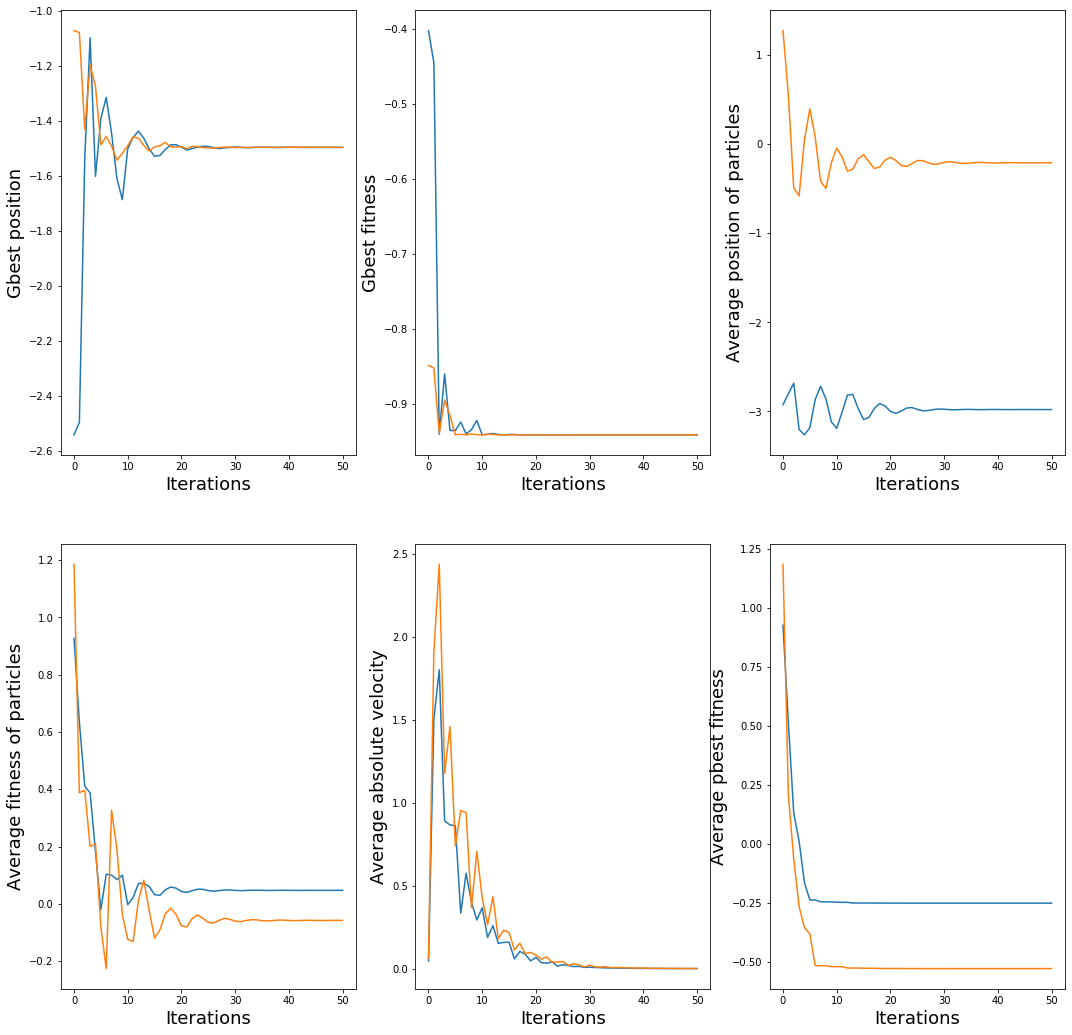

In [7]:
from statistics import mean

xVan = 20 * np.random.rand(Nx, 1) - 10
vVan = 0.2 * np.random.rand(Nx, 1) - 0.1
xChaos = 20 * getChaosPoints (Nx, 4) - 10
xChaos = np.reshape (xChaos, (-1,1))
vChaos = 0.2 * getChaosPoints (Nx, 4) - 0.1
vChaos = np.reshape (vChaos, (-1,1))
pbestVan = xVan
pbestChaos = xChaos

numIter = 50
gbestVan = min (xVan , key = lambda x : obj(x))
gbestChaos = min (xChaos , key = lambda x : obj(x))

################################################################################################
# Plot 1 list -----------------> Gbest point per iteration
gbvCache = [gbestVan]
gbcCache = [gbestChaos]

# Plot 2 list -----------------> Gbest point objective value per iteration
gbvoCache = [obj(gbestVan)]
gbcoCache = [obj(gbestChaos)]

# Plot 3 list -----------------> Average of points 
xavgvCache = [np.average (xVan)]
xavgcCache = [np.average (xChaos)]

# Plot 4 list -----------------> Average of fitness
xoavgvCache = [np.average (obj(xVan))]
xoavgcCache = [np.average (obj(xChaos))]

# Plot 5 list -----------------> Average of absolute velocity
vavgvCache = [np.average (abs(vVan))]
vavgcCache = [np.average (abs(vChaos))]

# Plot 6 list -----------------> Average of pbest fitness
pbavgvCache = [np.average (obj(pbestVan))]
pbavgcCache = [np.average (obj(pbestChaos))]
################################################################################################

for i in range (0, numIter) :
    vVan = w*vVan + c1*r1*(pbestVan - xVan) + c2*r2*(gbestVan - xVan)
    vChaos = w*vChaos + c1*r1*(pbestChaos - xChaos) + c2*r2*(gbestChaos - xChaos)
    xVan = xVan + vVan
    xChaos = xChaos + vChaos
    
    less = obj(xVan) < obj(pbestVan)
    pbestVan = less * xVan + np.invert (less) * pbestVan
    less = obj(xChaos) < obj(pbestChaos)
    pbestChaos = less * xChaos + np.invert (less) * pbestChaos
    
    ################################################################################################
    gbestVan = min (xVan , key = lambda x : obj(x))
    gbestChaos = min (xChaos , key = lambda x : obj(x))
    
    # Appending to list for plot 1
    gbvCache.append (gbestVan)
    gbcCache.append (gbestChaos)
    
    # Appending to list for plot 2
    gbvoCache.append (obj(gbestVan))
    gbcoCache.append (obj(gbestChaos))
    
    # Appending to list for plot 3
    xavgvCache.append (np.average (xVan))
    xavgcCache.append (np.average (xChaos))
    
    # Appending to list for plot 4
    xoavgvCache.append (np.average (obj(xVan)))
    xoavgcCache.append (np.average (obj(xChaos)))
    
    # Appending to list for plot 5
    vavgvCache.append (np.average (abs(vVan)))
    vavgcCache.append (np.average (abs(vChaos)))
    
    # Appending to list for plot 6
    pbavgvCache.append (np.average (obj(pbestVan)))
    pbavgcCache.append (np.average (obj(pbestChaos)))
    ################################################################################################
    
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 18))

# Plot 1 ---> Global best position vs. Iterations 
plt.subplot (2,3,1)
plt.plot (np.arange (numIter + 1), gbvCache)
plt.plot (np.arange (numIter + 1), gbcCache)
plt.ylabel ('Gbest position', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 2 ---> Global best fitness vs. Iterations 
plt.subplot (2,3,2)
plt.plot (np.arange (numIter + 1), gbvoCache)
plt.plot (np.arange (numIter + 1), gbcoCache)
plt.ylabel ('Gbest fitness', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 3 ---> Average absolute velocity vs. Iterations 
plt.subplot (2,3,3)
plt.plot (np.arange (numIter + 1), xavgvCache)
plt.plot (np.arange (numIter + 1), xavgcCache)
plt.ylabel ('Average position of particles', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 4 ---> Average fitness vs. Iterations 
plt.subplot (2,3,4)
plt.plot (np.arange (numIter + 1), xoavgvCache)
plt.plot (np.arange (numIter + 1), xoavgcCache)
plt.ylabel ('Average fitness of particles', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 5 ---> Average absolute velocity vs. Iterations 
plt.subplot (2,3,5)
plt.plot (np.arange (numIter + 1), vavgvCache)
plt.plot (np.arange (numIter + 1), vavgcCache)
plt.ylabel ('Average absolute velocity', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

# Plot 6 ---> Average pbest fitness vs. Iterations 
plt.subplot (2,3,6)
plt.plot (np.arange (numIter + 1), pbavgvCache)
plt.plot (np.arange (numIter + 1), pbavgcCache)
plt.ylabel ('Average pbest fitness', fontsize = 18)
plt.xlabel ('Iterations', fontsize = 18)

plt.show ()